In [1]:
#Loading the data into a dataframe

import csv
import pandas as pd
import matplotlib.pyplot as plt

#Importing a limited section of the dataset for now for easier processing
df = pd.read_csv("poisonous_mushrooms.csv", nrows=10000)
# Source: https://www.kaggle.com/datasets/davinascimento/poisonous-mushrooms?resource=download
# this assumes that you have the csv downloaded and stored in the same directory as this file

# Iterates through the columns, prints out counts of each data for each column
for column in df:
	df_series = df[column]
	results = df_series.value_counts()
	print("Results for column: ", column)
	print(results)
	print("Missing: ", df_series.isnull().sum(), "\n")

# results will be looked at more carefully in below cells, so don't worry about scrolling


Results for column:  id
id
0       1
6670    1
6663    1
6664    1
6665    1
       ..
3333    1
3334    1
3335    1
3336    1
9999    1
Name: count, Length: 10000, dtype: int64
Missing:  0 

Results for column:  class
class
p    5477
e    4523
Name: count, dtype: int64
Missing:  0 

Results for column:  cap-diameter
cap-diameter
1.52     35
3.71     31
3.77     31
4.04     29
3.04     29
         ..
9.89      1
21.38     1
12.38     1
15.90     1
52.51     1
Name: count, Length: 1554, dtype: int64
Missing:  0 

Results for column:  cap-shape
cap-shape
x    4597
f    2128
s    1155
b    1070
p     387
o     352
c     310
d       1
Name: count, dtype: int64
Missing:  0 

Results for column:  cap-surface
cap-surface
t        1501
s        1244
y        1064
h         945
g         813
d         689
k         391
e         389
w         361
i         327
l         146
15.94       1
f           1
Name: count, dtype: int64
Missing:  2128 

Results for column:  cap-color
cap-color
n    4371


Focusing first on the counts of different attributes in the categorical cells...

First is the poisonous or edible attribute (p = poisonous, e = edible)

This is the target data. As the results below show, about 55% of this subsample (when N = 2000) is poisonous, which is relatively balanced

In [2]:
print(df["class"].value_counts())

class
p    5477
e    4523
Name: count, dtype: int64


Cap Data:

Labels from the Kaggle dataset

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s, oval=o

cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s, l: silky

cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, black=k


These seem like they would make good features (at least in terms of data quality)


In [3]:
for cat in ["cap-shape", "cap-surface", "cap-color"]:
	print(df[cat].value_counts())
	print("Missing: ", df_series.isnull().sum(), "\n")


#Results suggest solid mix of cap shapes and surface types; might need to sample from shape and color data to balance the input sets

cap-shape
x    4597
f    2128
s    1155
b    1070
p     387
o     352
c     310
d       1
Name: count, dtype: int64
Missing:  0 

cap-surface
t        1501
s        1244
y        1064
h         945
g         813
d         689
k         391
e         389
w         361
i         327
l         146
15.94       1
f           1
Name: count, dtype: int64
Missing:  0 

cap-color
n    4371
y    1223
w    1198
g     723
e     646
o     543
p     311
u     249
r     232
k     212
b     181
l     111
Name: count, dtype: int64
Missing:  0 



cap-diameter:

In [4]:
print(df["cap-diameter"].describe())
print("Missing: ", df_series.isnull().sum(), "\n")

count    10000.000000
mean         6.337571
std          4.831925
min          0.500000
25%          3.300000
50%          5.760000
75%          8.240000
max         58.110000
Name: cap-diameter, dtype: float64
Missing:  0 



gill data:

All categories, summaries below. Some are missing attributes:

gill-attachment: attached=a, descending=d, free=f, notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

In [5]:
for column in ["gill-attachment", "gill-spacing", "gill-color"]:
	df_series = df[column]
	print(column)
	print("Missing: ", df_series.isnull().sum(), "\n")

gill-attachment
Missing:  1660 

gill-spacing
Missing:  4040 

gill-color
Missing:  0 



Gill spacing missing enough data that it would probably be simpler to ignore it

Stem Data:


In [6]:
for column in ["stem-width", "stem-height"]:
	df_series = df[column]
	print(column)
	print(df_series.describe())
	zeros = df_series.value_counts().get(0.0)
	print("Missing: ", zeros, "\n")

stem-width
count    10000.000000
mean        11.158067
std          8.167508
min          0.000000
25%          4.950000
50%          9.600000
75%         15.782500
max         86.520000
Name: stem-width, dtype: float64
Missing:  1 

stem-height
count    10000.000000
mean         6.363452
std          2.754037
min          0.000000
25%          4.660000
50%          5.840000
75%          7.420000
max         29.340000
Name: stem-height, dtype: float64
Missing:  1 



Other relevant data:
does-bruise-or-bleed
has-ring

Imbalanced features, but not too hard to clean


Spore color, Veil Color, and Veil Type has more missing entries than filled, so those will likely be ignored

### Correlation Analysis
Several of the attributes are continous values, so we can find the correlation between them

      class  cap-diameter  stem-width  stem-height
0         0          8.80       15.39         4.51
1         1          4.51        6.48         4.79
2         0          6.94        9.93         6.85
3         0          3.88        6.53         4.16
4         0          5.85        8.36         3.37
...     ...           ...         ...          ...
9995      1          1.35        2.58         1.84
9996      0          3.78        3.32         4.74
9997      0          9.58       23.05         9.89
9998      0          6.20        7.78         5.19
9999      1          0.89        2.36         3.12

[10000 rows x 4 columns]


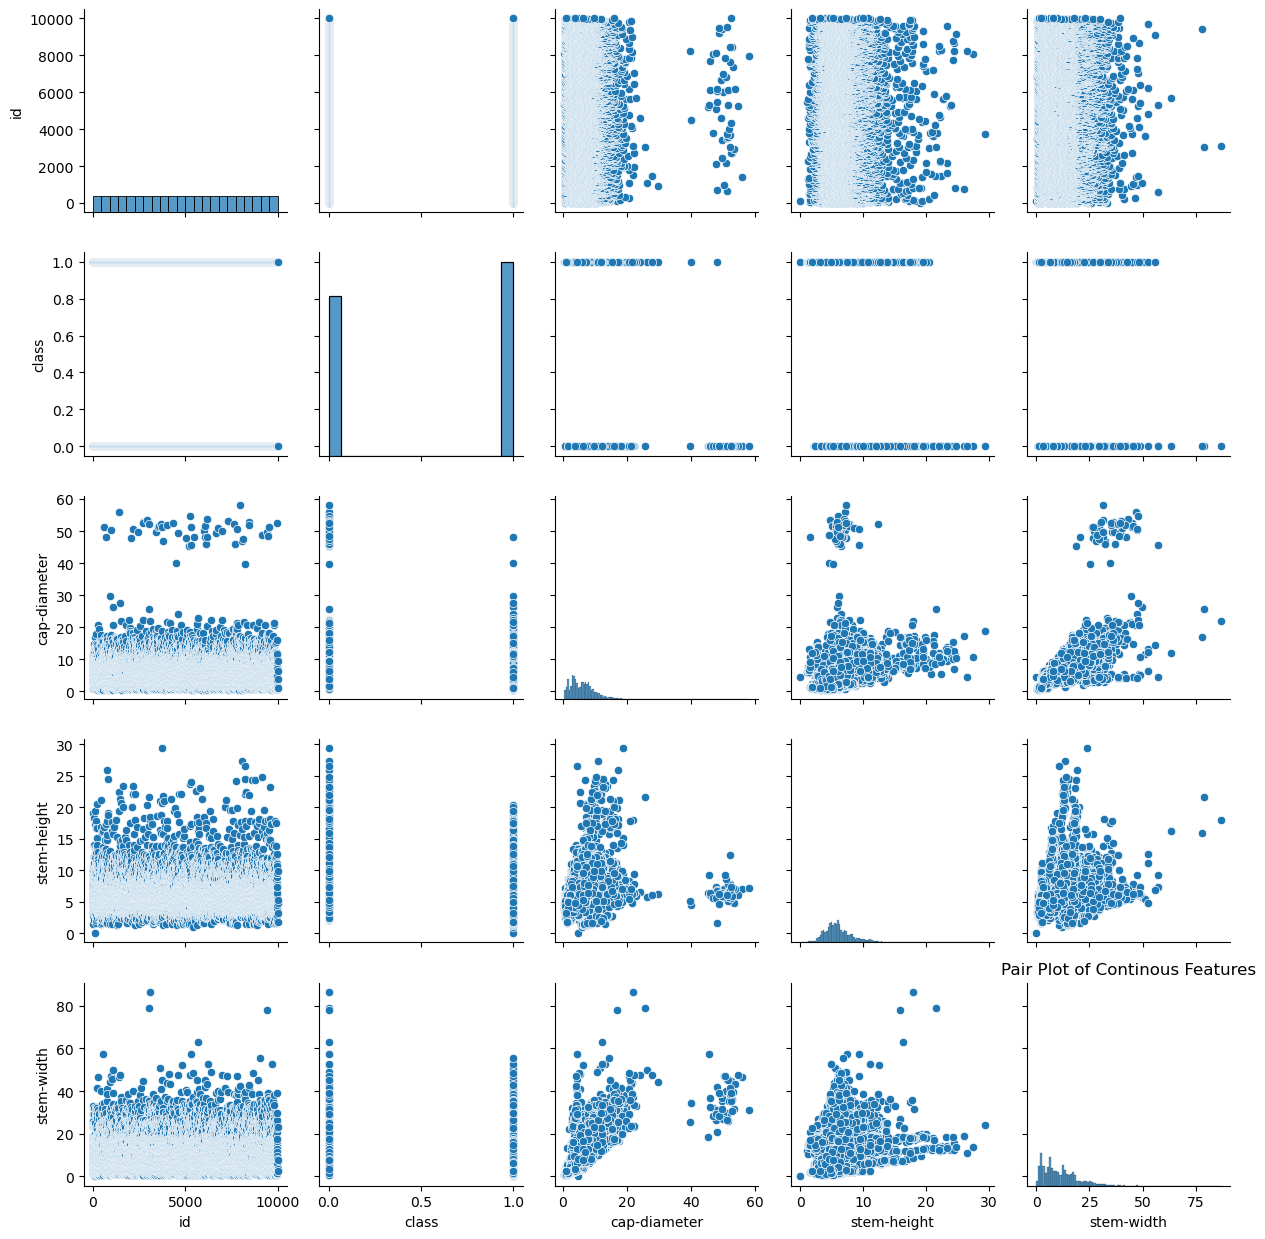

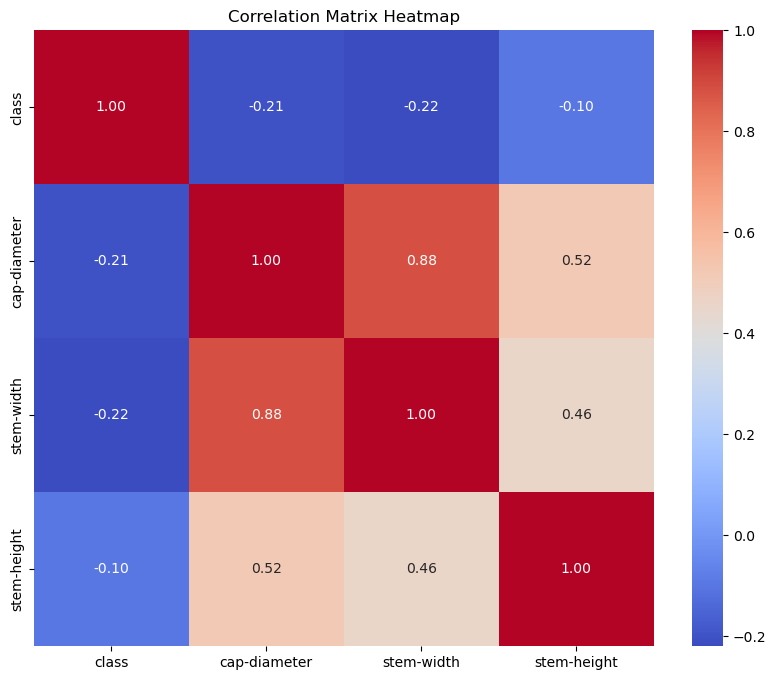

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Map poisionous or not to an integer
mapping = {'p': 1, 'e': 0}
df["class"] = df["class"].map(mapping)

# Rename target feature to "poisionous" in the dataframe
#df_r.rename({"class": "class"})
#df["class"] = df_r
#df.drop("class", axis=1)
df.drop("id", axis=1)

# Create a heatmap for the correlation matrix
continuousFeatures = ["class", "cap-diameter", "stem-width", "stem-height"]
dfC = df[continuousFeatures]
print(dfC)

# from Lab 0
# Measure the relationships between different features
# Visualize relationships using scatter plots
sns.pairplot(df)
plt.title('Pair Plot of Continous Features')
plt.tight_layout()
plt.show()

# Calculate correlation matrix
correlation_matrix = dfC.corr('spearman')

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

These results suggest that all three of these continous variables are not directly correlated with the poisonous attribute. Outliers have yet to be handled, so this might need to be rerun to ensure that this isn't affecting the numbers.

As for the categorical data, we can simply look at the counts of how many of each label are poisonous or not to try to get a feel for which features matter.


For example, the following code looks at cap shape.

   cap-shape  class  count
0          b      0    234
1          b      1    836
2          c      0    151
3          c      1    159
4          d      0      1
5          f      0   1065
6          f      1   1063
7          o      0    115
8          o      1    237
9          p      0    200
10         p      1    187
11         s      0    551
12         s      1    604
13         x      0   2206
14         x      1   2391


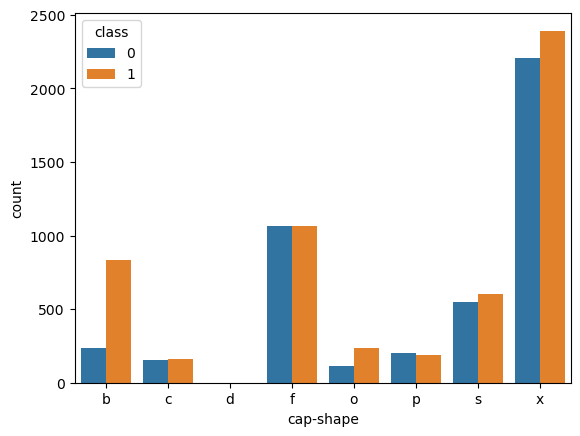

In [8]:
def countFeatureAndPoisonousCases(df, feature, printTable=False):
	features = [feature, "class"]
	df_T = df[features]
	df_T = df_T.groupby(feature)["class"].value_counts().sort_index()
	df_T = df_T.to_frame().reset_index()
	if printTable:
		print(df_T)
	sns.barplot(x=df_T[feature], y=df_T["count"], hue=df_T["class"])
	plt.show()

countFeatureAndPoisonousCases(df, "cap-shape", printTable=True)

The next code blocks do the same thing for a number of other variables...

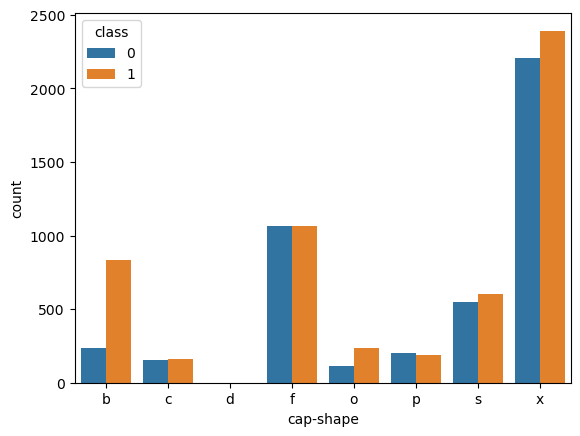

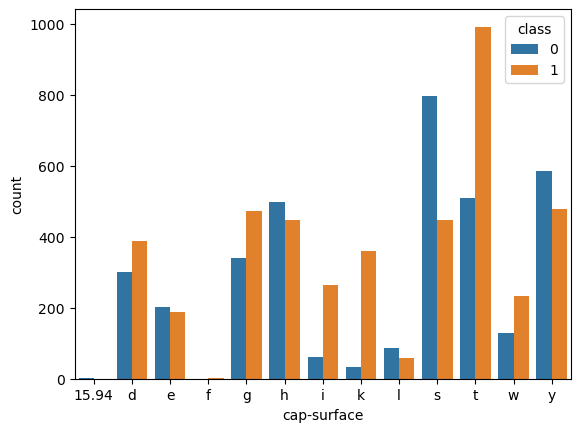

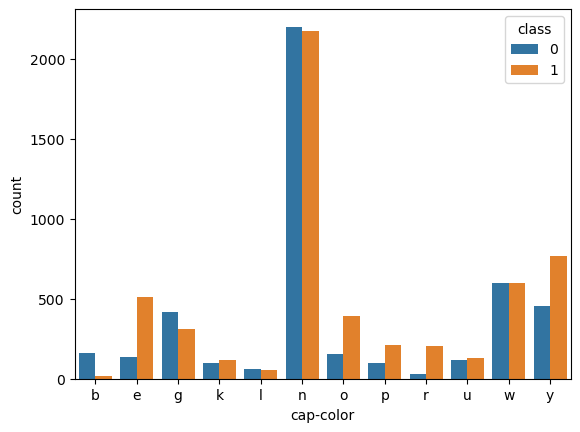

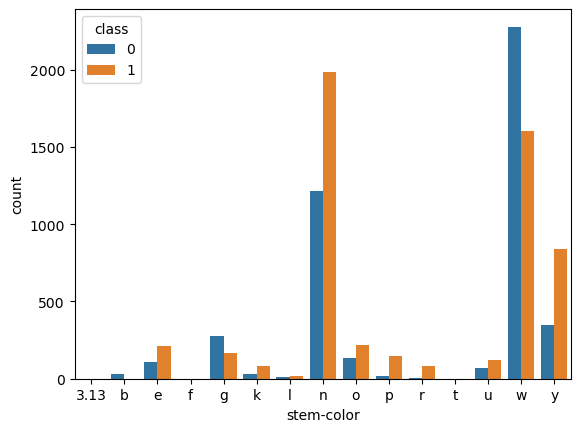

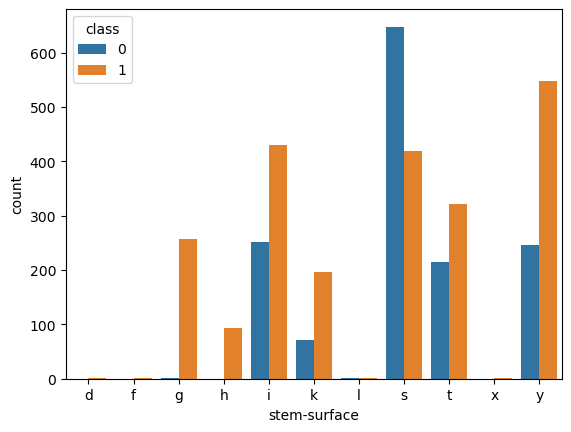

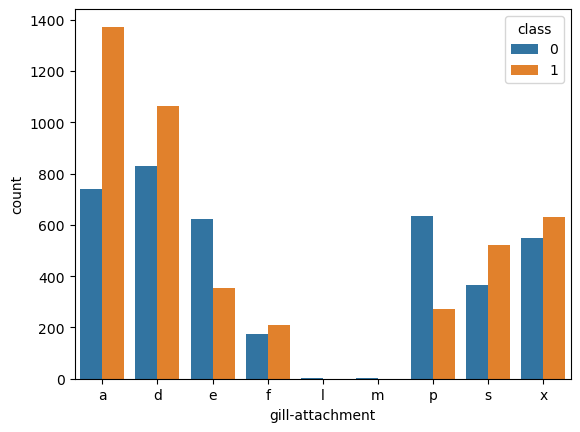

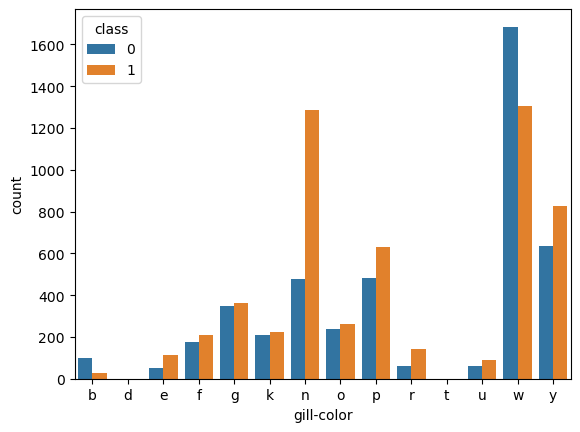

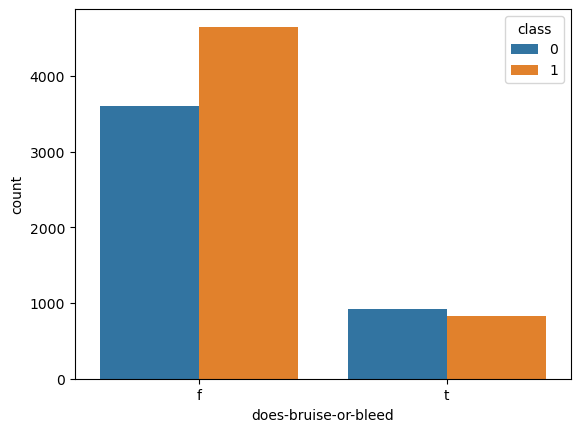

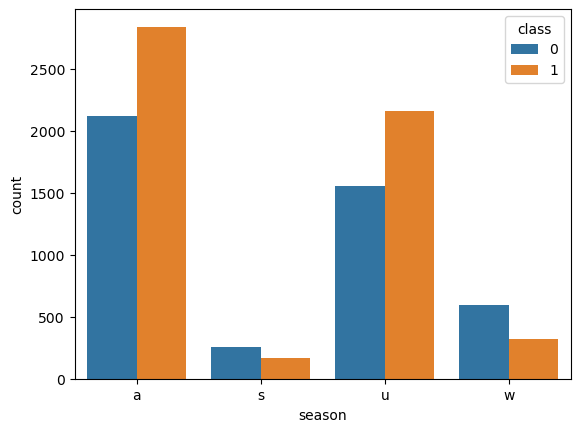

In [9]:
for attr in ["cap-shape", "cap-surface", "cap-color", "stem-color", "stem-surface", "gill-attachment","gill-color", "does-bruise-or-bleed", "season"]:
	countFeatureAndPoisonousCases(df, attr)

Based on the results above, I suspect we should use stem color, stem surface, gill attachment, gill color, cap surface, and cap color. Diameter and height might also be interesting, but don't seem to provide any apparent benefit at the moment.

### Delving Deeper into Data

In [10]:
#from statsmodels.graphics.mosaicplot import mosaic

# Sample code showing how to use the Crosstab feature from pandas
def generateCrosstab(dataframe, ind, col):
	inList = []
	colList = []
	for indCat in ind:
		inList.append(dataframe[indCat])
	for colCat in col:
		colList.append(dataframe[colCat])
	return pd.crosstab(index=inList, columns=colList)

ct = generateCrosstab(df, ["cap-color", "season"], ["class", "does-bruise-or-bleed"])
print(ct)

# Create the mosaic plot
#mosaic(ct.stack(), title='Mosaic Plot Example')

# Show the plot
#plt.show()

class                   0         1     
does-bruise-or-bleed    f    t    f    t
cap-color season                        
b         a            92    0   11    0
          s             1    0    0    0
          u            18    0    8    0
          w            51    0    0    0
e         a            39   29  247   56
          s             0    0   19    0
          u            23   28  143   23
          w            17    0   22    0
g         a           123   21  127   42
          s            61    0   11    0
          u            84   30   84   20
          w            95    0   24    1
k         a            45    1   48    7
          s             0    0    1    0
          u            38    0   54    2
          w            12    0    4    0
l         a            27    0   27    0
          u            22    0   24    0
          w            10    0    1    0
n         a           783  269  915  173
          s           124    0   94    0
          u     

In [11]:
print(generateCrosstab(df, ["gill-color", "gill-attachment"], ["class"]))

class                         0    1
gill-color gill-attachment          
b          a                  1    0
           d                 25   27
           s                 23    0
d          x                  0    1
e          a                 29    0
           e                  0    1
           p                 24   37
           x                  0   21
f          f                174  210
g          a                 85  139
           d                  2   33
           e                 25   15
           l                  1    0
           p                 46    0
           s                 69   59
           x                  9    0
k          a                 30   56
           d                  1    0
           e                 41   12
           x                  1    0
n          a                 69  445
           d                  1  267
           e                 71   26
           p                129   69
           s                 22  118
 

From the gill data, we find the following strong predictors:
Green gills + attached or descending --> more likely poisonsous, "P" (just realized that gill attachment has some non-listed attributes in the guide)

Brown gills:
attached and detached strongly poisonous, same with "s"; "e" & "x" less so

Pink gills:
detached more likely good, as with "e" & "s". "x" typically poisonous


(Probably worth delving into this for later models, but thinking we should keep it simple for now)


### Logistic Regresion with Stochastic Gradient Descent


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X = df.drop('class', axis = 1)
y = df['class']

label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object': 
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

if y.dtype == 'object':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=42)

X_train.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
9069,9069,11.04,7,10,10,0,0,1,12,11.31,...,5,11,13,1,6,0,1,7,0,0
2603,2603,3.24,7,5,5,0,9,0,6,5.41,...,5,7,13,1,4,0,1,1,0,3
7738,7738,6.15,7,8,10,0,1,3,8,3.53,...,5,11,13,1,6,0,1,7,1,2
1579,1579,7.05,3,9,5,0,7,0,12,5.73,...,0,4,7,1,6,0,1,7,3,3
5058,5058,8.17,7,5,8,0,9,0,12,11.24,...,5,11,13,0,4,2,2,7,0,0


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report 

# Initialize and train classifier
classifier = SGDClassifier(loss='log_loss', max_iter=100)
model = classifier.fit(X_train, y_train)

y_pred = model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred, normalize=True)
class_report = classification_report(y_test, y_pred)

# Print results
print("The accuracy of the model is:", lr_accuracy)
print("Classification Report:\n", class_report)


The accuracy of the model is: 0.608
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.62      0.58      1318
           1       0.67      0.60      0.63      1682

    accuracy                           0.61      3000
   macro avg       0.61      0.61      0.61      3000
weighted avg       0.62      0.61      0.61      3000



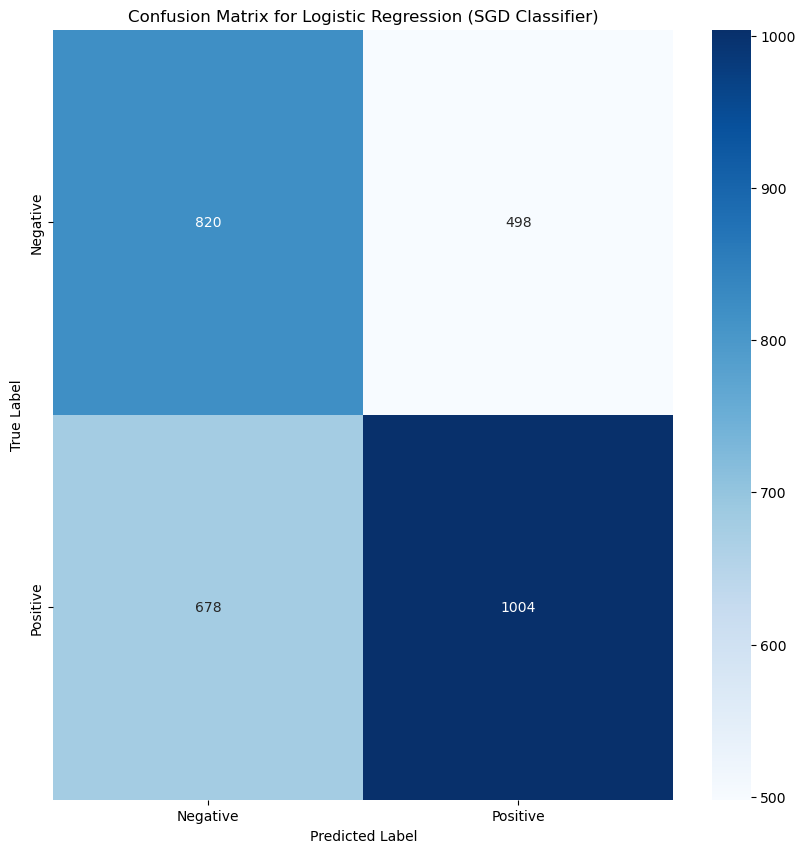

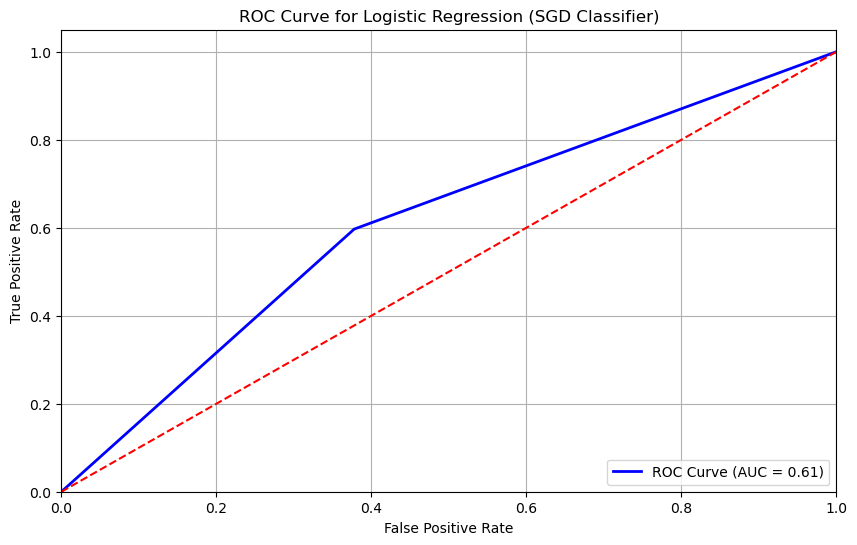

In [19]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression (SGD Classifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (SGD Classifier)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Deep Neural Network with Stochastic Gradient Descent


In [20]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)
y = df['class']

# Encode features
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object': 
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#deep neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),#Hidden layer
    layers.Dense(1, activation='sigmoid') #Output layer
])

# stochastic gradient descent
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.7329 - accuracy: 0.4759 - val_loss: 0.7082 - val_accuracy: 0.4964
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.5077 - val_loss: 0.6874 - val_accuracy: 0.5350
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5352 - val_loss: 0.6747 - val_accuracy: 0.5686
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5584 - val_loss: 0.6663 - val_accuracy: 0.5900
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5759 - val_loss: 0.6602 - val_accuracy: 0.6000
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.5889 - val_loss: 0.6554 - val_accuracy: 0.6057
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.5962 - val_loss: 0.6513 - val_accuracy: 0.6129

In [21]:
print("The accuracy of the model is:", accuracy)
print("Classification Report:\n", class_report)

The accuracy of the model is: 0.781
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75      1318
           1       0.80      0.82      0.81      1682

    accuracy                           0.78      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.78      0.78      0.78      3000



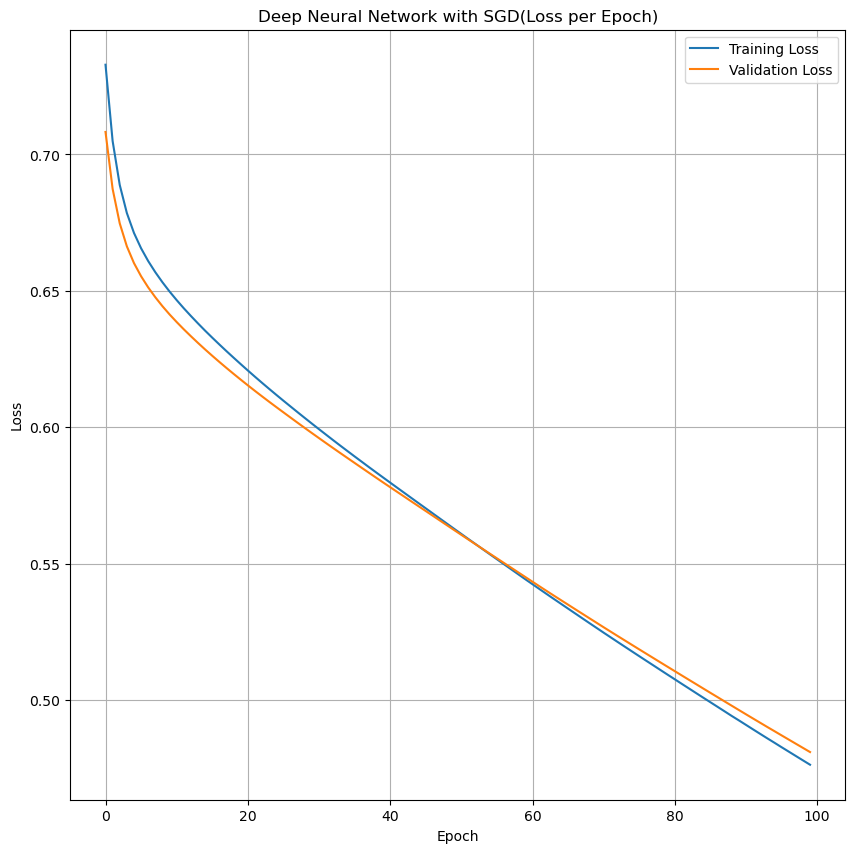

In [22]:
# Plot Loss per Epoch for Deep Neural Network
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Deep Neural Network with SGD(Loss per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


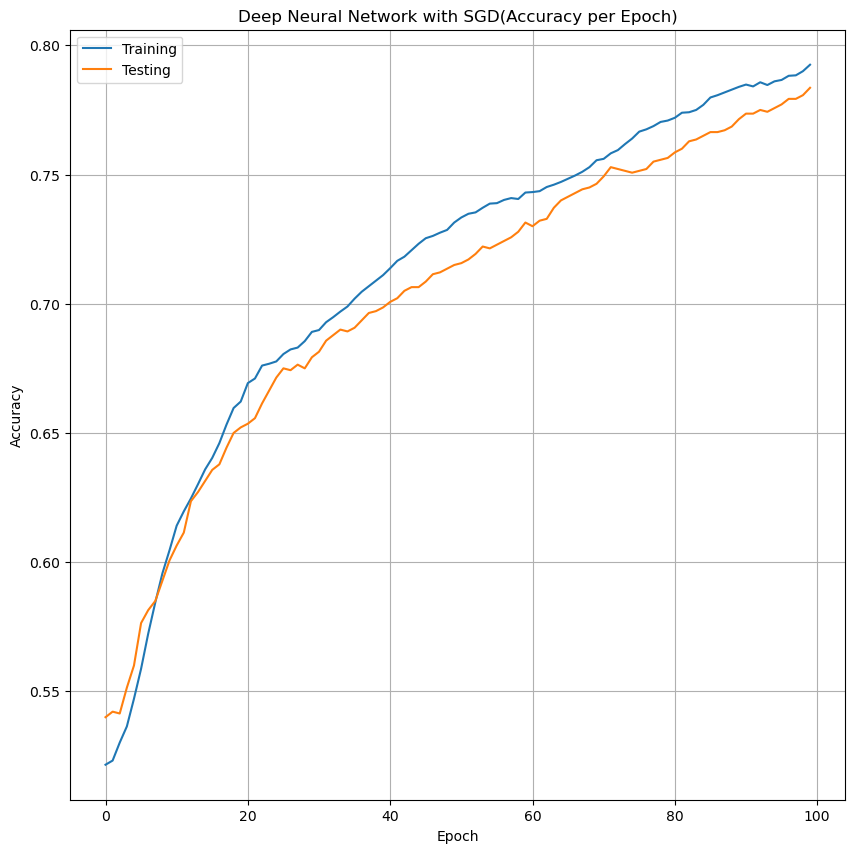

In [54]:
# another plot for model accuracy over training time
#print(history.history.keys())
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Testing')
plt.title('Deep Neural Network with SGD(Accuracy per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Gradient Boosting


Accuracy: 0.9236666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1318
           1       0.93      0.93      0.93      1682

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



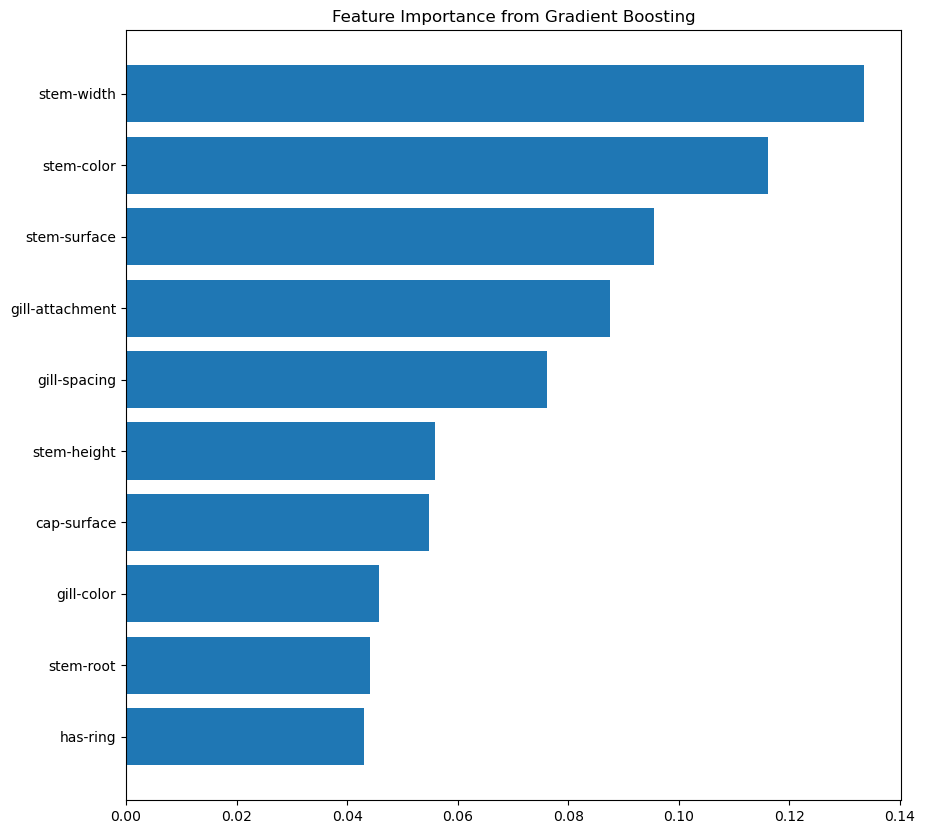

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

#Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

orig_feature_names = X.columns
importance = gb_model.feature_importances_
imp_list = np.argsort(importance)[-10:]
plt.figure(figsize=(10, 10))
plt.barh([orig_feature_names[i] for i in imp_list], importance[imp_list])
plt.title("Feature Importance from Gradient Boosting")
plt.show()

### XGBoost


Accuracy: 0.9836666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1318
           1       0.99      0.98      0.99      1682

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



<Figure size 1000x1000 with 0 Axes>

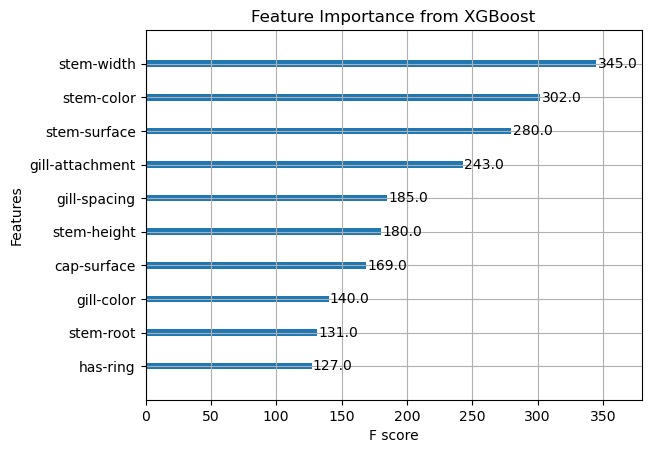

In [24]:
from xgboost import XGBClassifier, plot_importance

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

plt.figure(figsize=(10, 10))
plot_importance(xgb_model, max_num_features=10).set_yticklabels([orig_feature_names[i] for i in imp_list])
plt.title("Feature Importance from XGBoost")
plt.show()

### K-Fold Cross Validation for Logistic Regression with Stochastic Gradient Descent

Accuracy of fold 1: 0.5630
Precision of fold 1: 0.5645
Recall of fold 1: 0.9733
F1 of fold 1: 0.7146
Accuracy of fold 2: 0.4475
Precision of fold 2: 0.7234
Recall of fold 2: 0.0302
F1 of fold 2: 0.0580
Accuracy of fold 3: 0.5505
Precision of fold 3: 0.5510
Recall of fold 3: 0.9717
F1 of fold 3: 0.7032
Accuracy of fold 4: 0.5175
Precision of fold 4: 0.5188
Recall of fold 4: 0.9692
F1 of fold 4: 0.6758
Accuracy of fold 5: 0.5485
Precision of fold 5: 0.5484
Recall of fold 5: 0.9844
F1 of fold 5: 0.7044


Average accuracy of all folds: 0.5254
Average precision of all folds: 0.5467
Average recall of all folds: 0.7805
Average f1-score of all folds: 0.6431


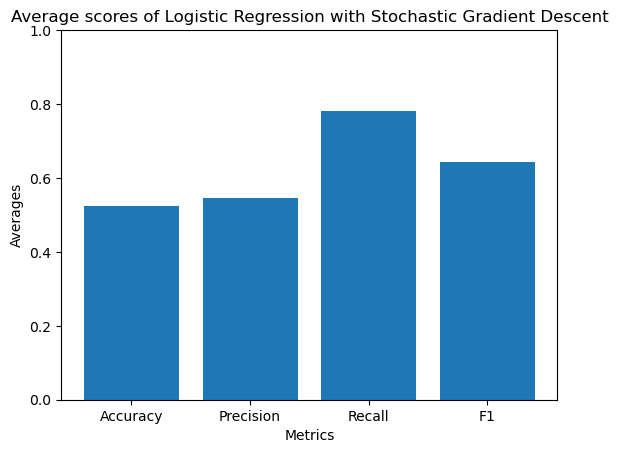

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop('class', axis = 1)
y = df['class']

label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object': 
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

if y.dtype == 'object':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)

# Turn Dataframe into an array
X_array = X.to_numpy()

# Lists to keep track of actual and predicted y
predicted_y = []
actual_y = []

number = 0

k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Split the data into training and testing sets
for train_index, test_index in k_fold.split(X_array, y):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train classifier
    classifier = SGDClassifier(loss='log_loss', max_iter=100)
    model = classifier.fit(X_train, y_train)

    predict_fold = classifier.predict(X_test)
    predicted_y.extend(predict_fold)
    actual_y.extend(y_test)
    
    accuracy = accuracy_score(y_test, predict_fold)
    precision = precision_score(y_test, predict_fold)
    recall = recall_score(y_test, predict_fold)
    f1 = f1_score(y_test, predict_fold)
    
    print(f"Accuracy of fold {number + 1}: {accuracy:.4f}")
    print(f"Precision of fold {number + 1}: {precision:.4f}")
    print(f"Recall of fold {number + 1}: {recall:.4f}")
    print(f"F1 of fold {number + 1}: {f1:.4f}")
    number += 1

print("\n")
accuracy = accuracy_score(actual_y, predicted_y)
print(f"Average accuracy of all folds: {accuracy:.4f}")
precision = precision_score(actual_y, predicted_y)
print(f"Average precision of all folds: {precision:.4f}")
recall = recall_score(actual_y, predicted_y)
print(f"Average recall of all folds: {recall:.4f}")
f1 = f1_score(actual_y, predicted_y)
print(f"Average f1-score of all folds: {f1:.4f}")

x_values1 = ['Accuracy', 'Precision', 'Recall', 'F1']
y_values1 = [accuracy, precision, recall, f1]

# Create plot
plt.bar(x_values1, y_values1)
plt.xlabel('Metrics')
plt.ylabel('Averages')
plt.yticks(np.arange(0, 1.01, 0.2))
plt.title('Average scores of Logistic Regression with Stochastic Gradient Descent')
plt.show()

### K-Fold Cross Validation for Deep Neural Network with Stochastic Gradient Descent


Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.7282 - accuracy: 0.4844 - val_loss: 0.7167 - val_accuracy: 0.5213
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.5197 - val_loss: 0.7022 - val_accuracy: 0.5425
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5456 - val_loss: 0.6936 - val_accuracy: 0.5525
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5594 - val_loss: 0.6878 - val_accuracy: 0.5525
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5681 - val_loss: 0.6833 - val_accuracy: 0.5575
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5727 - val_loss: 0.6795 - val_accuracy: 0.5600
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.5794 - val_loss: 0.6761 - val_accuracy: 0.5731

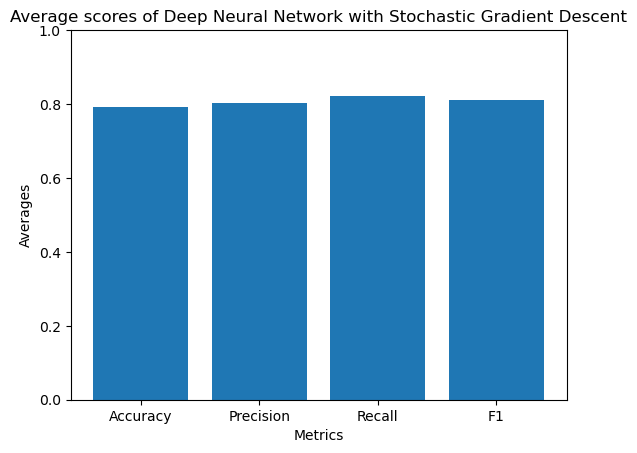

In [27]:
X = df.drop('class', axis=1)
y = df['class']

# Encode features
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object': 
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le
y = LabelEncoder().fit_transform(y)

# Turn Dataframe into an array
X_array = X.to_numpy()

# Lists to keep track of actual and predicted y
predicted_y = []
actual_y = []

number = 0

k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

scaler = StandardScaler()

def create_model():
    #deep neural network
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),#Hidden layer
        layers.Dense(1, activation='sigmoid') #Output layer
])

    # stochastic gradient descent
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the data into training and testing sets
for train_index, test_index in k_fold.split(X_array, y):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the model
    model = create_model()
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
    
    # predict probabilities for test set
    predict_prob = model.predict(X_test, verbose=0)
    # predict class labels for test set
    predict_fold = (model.predict(X_test) > 0.5).astype("int32")
    # reduce to 1d array for comparison
    predict_prob = predict_prob[:, 0]
    predict_fold = predict_fold[:, 0]

    # Send lists predicted and actual y values
    predicted_y.extend(predict_fold)
    actual_y.extend(y_test)
    
    accuracy = accuracy_score(y_test, predict_fold)
    precision = precision_score(y_test, predict_fold)
    recall = recall_score(y_test, predict_fold)
    f1 = f1_score(y_test, predict_fold)
    print(f"Accuracy of fold {number + 1}: {accuracy:.4f}")
    print(f"Precision of fold {number + 1}: {precision:.4f}")
    print(f"Recall of fold {number + 1}: {recall:.4f}")
    print(f"F1 score of fold {number + 1}: {f1:.4f}")
    number += 1

print("\n")
accuracy = accuracy_score(actual_y, predicted_y)
print(f"Average accuracy of all folds: {accuracy:.4f}")
precision = precision_score(actual_y, predicted_y)
print(f"Average precision of all folds: {precision:.4f}")
recall = recall_score(actual_y, predicted_y)
print(f"Average recall of all folds: {recall:.4f}")
f1 = f1_score(actual_y, predicted_y)
print(f"Average f1-score of all folds: {f1:.4f}")

x_values2 = ['Accuracy', 'Precision', 'Recall', 'F1']
y_values2 = [accuracy, precision, recall, f1]

# Create plot
plt.bar(x_values2, y_values2)
plt.xlabel('Metrics')
plt.ylabel('Averages')
plt.yticks(np.arange(0, 1.01, 0.2))
plt.title('Average scores of Deep Neural Network with Stochastic Gradient Descent')
plt.show()

### K-Fold Cross Validation for XGBoost

Accuracy of fold 1: 0.9845
Precision of fold 1: 0.9893
Recall of fold 1: 0.9831
F1 of fold 1: 0.9862
Accuracy of fold 2: 0.9835
Precision of fold 2: 0.9875
Recall of fold 2: 0.9831
F1 of fold 2: 0.9853
Accuracy of fold 3: 0.9840
Precision of fold 3: 0.9899
Recall of fold 3: 0.9808
F1 of fold 3: 0.9853
Accuracy of fold 4: 0.9820
Precision of fold 4: 0.9855
Recall of fold 4: 0.9798
F1 of fold 4: 0.9826
Accuracy of fold 5: 0.9865
Precision of fold 5: 0.9863
Recall of fold 5: 0.9890
F1 of fold 5: 0.9877


Average accuracy of all folds: 0.9841
Average precision of all folds: 0.9877
Average recall of all folds: 0.9832
Average f1-score of all folds: 0.9855


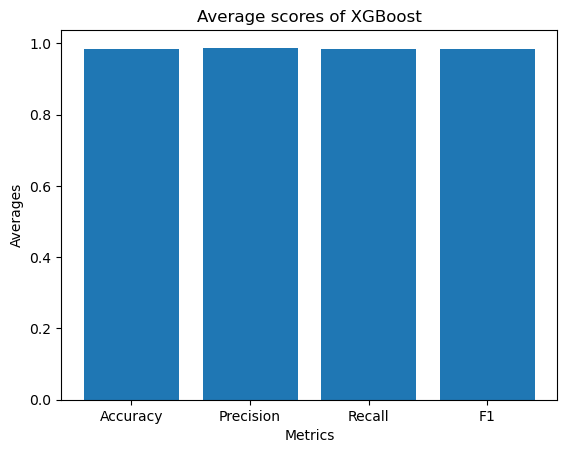

In [28]:
# Lists to keep track of actual and predicted y
predicted_y = []
actual_y = []

number = 0

k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Split the data into training and testing sets
for train_index, test_index in k_fold.split(X_array, y):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)

    predict_fold = xgb_model.predict(X_test)
    predicted_y.extend(predict_fold)
    actual_y.extend(y_test)

    accuracy = accuracy_score(y_test, predict_fold)
    precision = precision_score(y_test, predict_fold)
    recall = recall_score(y_test, predict_fold)
    f1 = f1_score(y_test, predict_fold)
    
    print(f"Accuracy of fold {number + 1}: {accuracy:.4f}")
    print(f"Precision of fold {number + 1}: {precision:.4f}")
    print(f"Recall of fold {number + 1}: {recall:.4f}")
    print(f"F1 of fold {number + 1}: {f1:.4f}")
    number += 1


print("\n")
accuracy = accuracy_score(actual_y, predicted_y)
print(f"Average accuracy of all folds: {accuracy:.4f}")
precision = precision_score(actual_y, predicted_y)
print(f"Average precision of all folds: {precision:.4f}")
recall = recall_score(actual_y, predicted_y)
print(f"Average recall of all folds: {recall:.4f}")
f1 = f1_score(actual_y, predicted_y)
print(f"Average f1-score of all folds: {f1:.4f}")

x_values3 = ['Accuracy', 'Precision', 'Recall', 'F1']
y_values3 = [accuracy, precision, recall, f1]

# Create plot
plt.bar(x_values3, y_values3)
plt.xlabel('Metrics')
plt.ylabel('Averages')
plt.yticks(np.arange(0, 1.01, 0.2))
plt.title('Average scores of XGBoost')
plt.show()

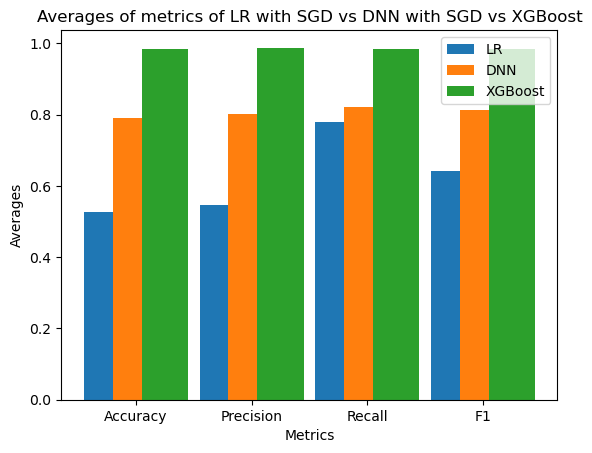

In [29]:
X = ['Accuracy','Precision','Recall','F1'] 
LRSGD = [y_values1[0], y_values1[1], y_values1[2], y_values1[3]] 
DNNSGD = [y_values2[0], y_values2[1], y_values2[2], y_values2[3]] 
XGBoost = [y_values3[0], y_values3[1], y_values3[2], y_values3[3]] 

X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.25, LRSGD, 0.4, label = 'LR') 
plt.bar(X_axis, DNNSGD, 0.4, label = 'DNN') 
plt.bar(X_axis + 0.25, XGBoost, 0.4, label = 'XGBoost') 
  
plt.xticks(X_axis, X) 
plt.xlabel('Metrics')
plt.ylabel('Averages')
plt.yticks(np.arange(0, 1.01, 0.2))
plt.title('Averages of metrics of LR with SGD vs DNN with SGD vs XGBoost')
plt.legend()
plt.show()